In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

In [2]:
loan = pd.read_csv("/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

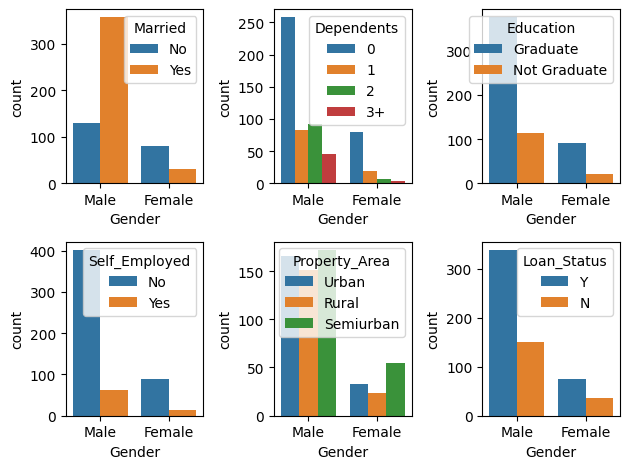

In [8]:
fig, ax = plt.subplots(2,3)
sns.countplot(x="Gender", hue="Married", data=loan, ax=ax[0,0])
sns.countplot(x="Gender", hue="Dependents", data=loan, ax=ax[0,1])
sns.countplot(x="Gender", hue="Education", data=loan, ax=ax[0,2])
sns.countplot(x="Gender", hue="Self_Employed", data=loan, ax=ax[1,0])
sns.countplot(x="Gender", hue="Property_Area", data=loan, ax=ax[1,1])
sns.countplot(x="Gender", hue="Loan_Status", data=loan, ax=ax[1,2])
plt.tight_layout()
fig.show()

In [9]:
# Check the value count for the Gender feature and convert non-numeric values
loan["Gender"].value_counts()
# Convert “Female” to 0 and “Male” to 1
loan["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)

/tmp/ipykernel_18/1642420967.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
/tmp/ipykernel_18/1642420967.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)


In [10]:
# Check the value count for the Married feature and convert non-numeric values
loan["Married"].value_counts()
loan["Married"].replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipykernel_18/2539697136.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Married"].replace({'Yes': 1, 'No': 0}, inplace=True)
/tmp/ipykernel_18/2539697136.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Married"].replace({'Yes': 1, 'No': 0}, inplace=True)


In [11]:
# Check the value count for the Dependents feature and convert non-numeric values
loan["Dependents"].value_counts()
loan["Dependents"].replace({'0' : 0, '1' : 1, '2' : 2, '3+': 3}, inplace=True)

/tmp/ipykernel_18/1195615028.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Dependents"].replace({'0' : 0, '1' : 1, '2' : 2, '3+': 3}, inplace=True)
/tmp/ipykernel_18/1195615028.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Dependents"].replace({'0' : 0, '1' : 1, '2' : 2, '3+'

In [12]:
# Check the value count for the Education feature and convert non-numeric values
loan["Education"].value_counts()
loan["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)

/tmp/ipykernel_18/2803372652.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
/tmp/ipykernel_18/2803372652.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, 

In [13]:
# Check the value count for the Self_Employed feature and convert non-numeric values
loan["Self_Employed"].value_counts()
loan["Self_Employed"].replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipykernel_18/3360183270.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Self_Employed"].replace({'Yes': 1, 'No': 0}, inplace=True)
/tmp/ipykernel_18/3360183270.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Self_Employed"].replace({'Yes': 1, 'No': 0}, inplace=True)


In [14]:
# Check the value count for the Property_Area feature and convert non-numeric values
loan["Property_Area"].value_counts()
loan["Property_Area"].replace({'Semiurban': 1, 'Urban': 2, 'Rural': 0}, inplace=True)

/tmp/ipykernel_18/1628749452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Property_Area"].replace({'Semiurban': 1, 'Urban': 2, 'Rural': 0}, inplace=True)
/tmp/ipykernel_18/1628749452.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Property_Area"].replace({'Semiurban': 1, 'Urba

In [15]:
# Check the value count for the Loan_Status feature and convert non-numeric values
loan["Loan_Status"].value_counts()
loan["Loan_Status"].replace({'Y': 1, 'N': 0}, inplace=True)

/tmp/ipykernel_18/2041625045.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Loan_Status"].replace({'Y': 1, 'N': 0}, inplace=True)
/tmp/ipykernel_18/2041625045.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan["Loan_Status"].replace({'Y': 1, 'N': 0}, inplace=True)


In [16]:
loan.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [17]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# display the mode for Gender
loan['Gender'].mode()
# select the first value using index 0 
loan['Gender'].mode()[0]
# Replace null values
loan["Gender"].fillna(value=loan['Gender'].mode()[0],inplace=True)

In [19]:
# display the mode for Married
loan['Married'].mode()[0]
# Replace null values
loan["Married"].fillna(value=loan['Gender'].mode()[0],inplace=True)

In [20]:
# display the mode for Dependents
loan['Dependents'].mode()[0]
# Replace null values
loan["Dependents"].fillna(value=loan['Dependents'].mode()[0],inplace=True)

In [21]:
# display the mode for Self_Employed
loan['Self_Employed'].mode()[0]
# Replace null values
loan["Self_Employed"].fillna(value=loan['Self_Employed'].mode()[0],inplace=True)

In [22]:
# display the mode for LoanAmount
loan['LoanAmount'].mode()[0]
# Replace null values
loan["LoanAmount"].fillna(value=loan['LoanAmount'].mode()[0],inplace=True)

/tmp/ipykernel_18/3372253023.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["LoanAmount"].fillna(value=loan['LoanAmount'].mode()[0],inplace=True)


In [23]:
# display the mode for Loan_Amount_Term
loan['Loan_Amount_Term'].mode()[0]
# Replace null values
loan["Loan_Amount_Term"].fillna(value=loan['Loan_Amount_Term'].mode()[0],inplace=True)

/tmp/ipykernel_18/624455236.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Loan_Amount_Term"].fillna(value=loan['Loan_Amount_Term'].mode()[0],inplace=True)


In [24]:
# display the mode for Credit_History
loan['Credit_History'].mode()[0]
# Replace null values
loan["Credit_History"].fillna(value=loan['Credit_History'].mode()[0],inplace=True)

/tmp/ipykernel_18/3330087855.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan["Credit_History"].fillna(value=loan['Credit_History'].mode()[0],inplace=True)


In [25]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
loan = loan.drop('Loan_ID', axis=1)

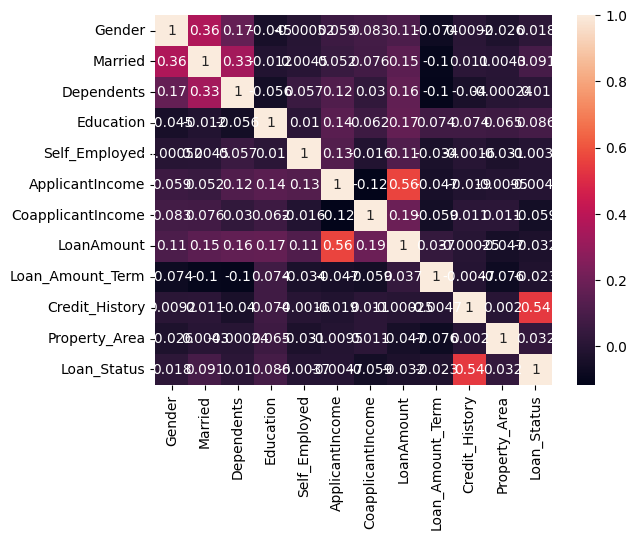

In [27]:
corr_matrix = loan.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
# Create the attribute and target data
X=loan.drop('Loan_Status',axis=1)
Y=loan["Loan_Status"]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [29]:
# Split the data into training and test data using train_test_split() function
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (552, 11) (62, 11)


In [30]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [31]:
# Evaluate using the training data
train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict))

Accuracy on training data:  0.7898550724637681
Precision on training data: 0.7700205338809035
Recall on training data: 0.9894459102902374


In [32]:
# Evaluate using the testing data
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))

Accuracy on testing data:  0.8225806451612904
Precision on testing data: 0.8076923076923077
Recall on testing data:  0.9767441860465116


In [33]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))

TN=9, FP=10, FN=1, TP=42


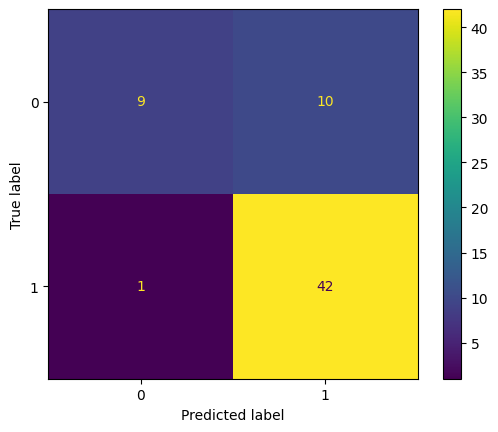

In [34]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [35]:
# Calculate the accuracy, precision and recall from the confusion matrix
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.8225806451612904
Calculated precision =  0.8076923076923077
Calculated recall =  0.9767441860465116
